# Generate category masks

## Prepare data

In [1]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import json
%matplotlib inline

Load JSON:

In [2]:
categories = json.load(open('Image Examples/categories.json'))["Categories"]

for category in categories:
    print(category)

{'name': 'Human', 'color': [255, 90, 90]}
{'name': 'Vehicle_Car', 'color': [47, 111, 238]}


Load images:

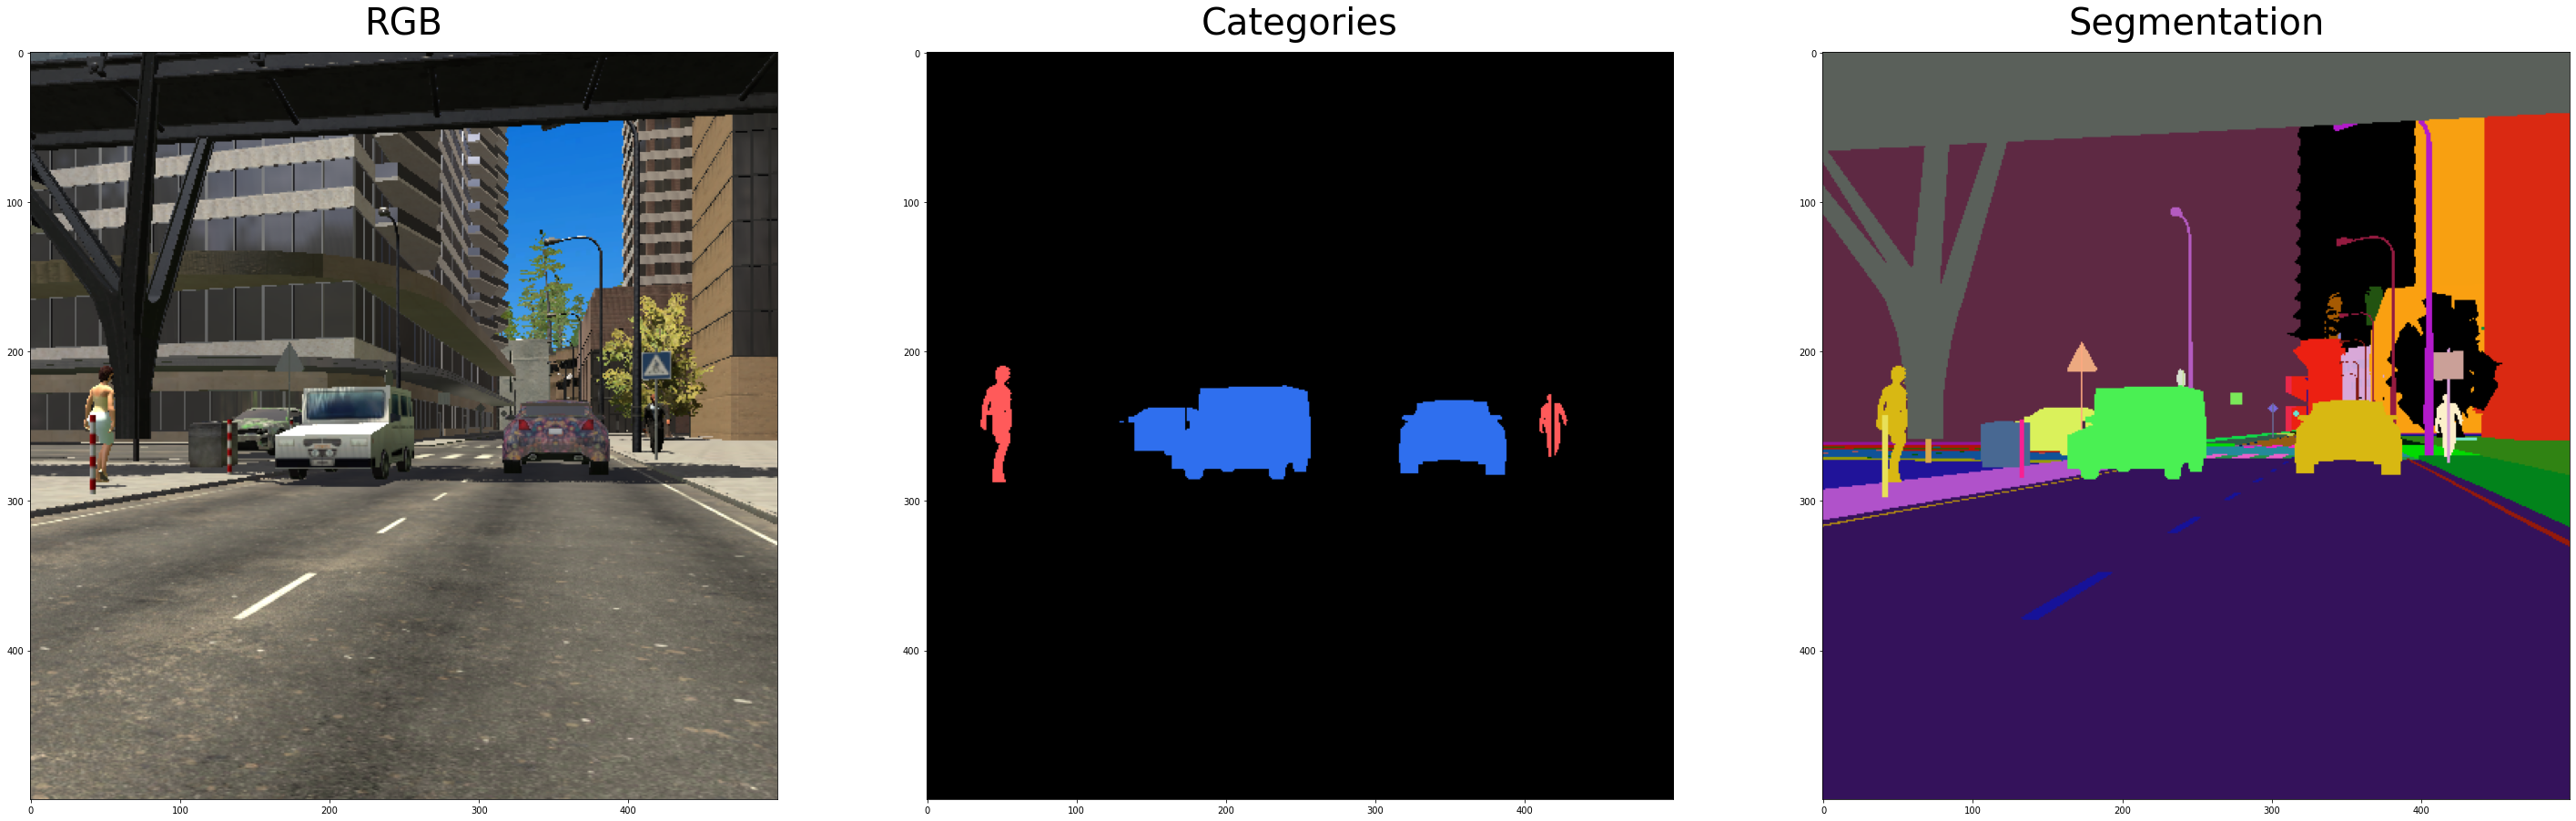

In [3]:
fig=plt.figure(figsize=(50, 50))

# RGB image
RGB_IMAGE = Image.open("Image Examples/RGB/photo_000000000032_City.png")
f = fig.add_subplot(1, 3, 1)
plt.imshow(RGB_IMAGE)
f.set_title("RGB", fontsize=40, pad=20)

# Categories image
CATEGORY_IMAGE = Image.open("Image Examples/Categories/photo_000000000032_City.png")
f = fig.add_subplot(1, 3, 2)
plt.imshow(CATEGORY_IMAGE)
f.set_title("Categories", fontsize=40, pad=20)

# Segmenation image
SEGMENTATION_IMAGE = Image.open("Image Examples/Segmentation/photo_000000000032_City.png")
f = fig.add_subplot(1, 3, 3)
plt.imshow(SEGMENTATION_IMAGE)
f.set_title("Segmentation", fontsize=40, pad=20)

plt.show()

## Generate masks

In [4]:
def only_color(color, image):
    r = color[0]
    g = color[1]
    b = color[2]
    RESULT = np.where(image[:,:,0] == r, 1, 0) * np.where(image[:,:,1] == g, 1, 0) * np.where(image[:,:,2] == b, 1, 0)
    return np.array(RESULT, dtype=np.uint8)

Generate a mask for each category:

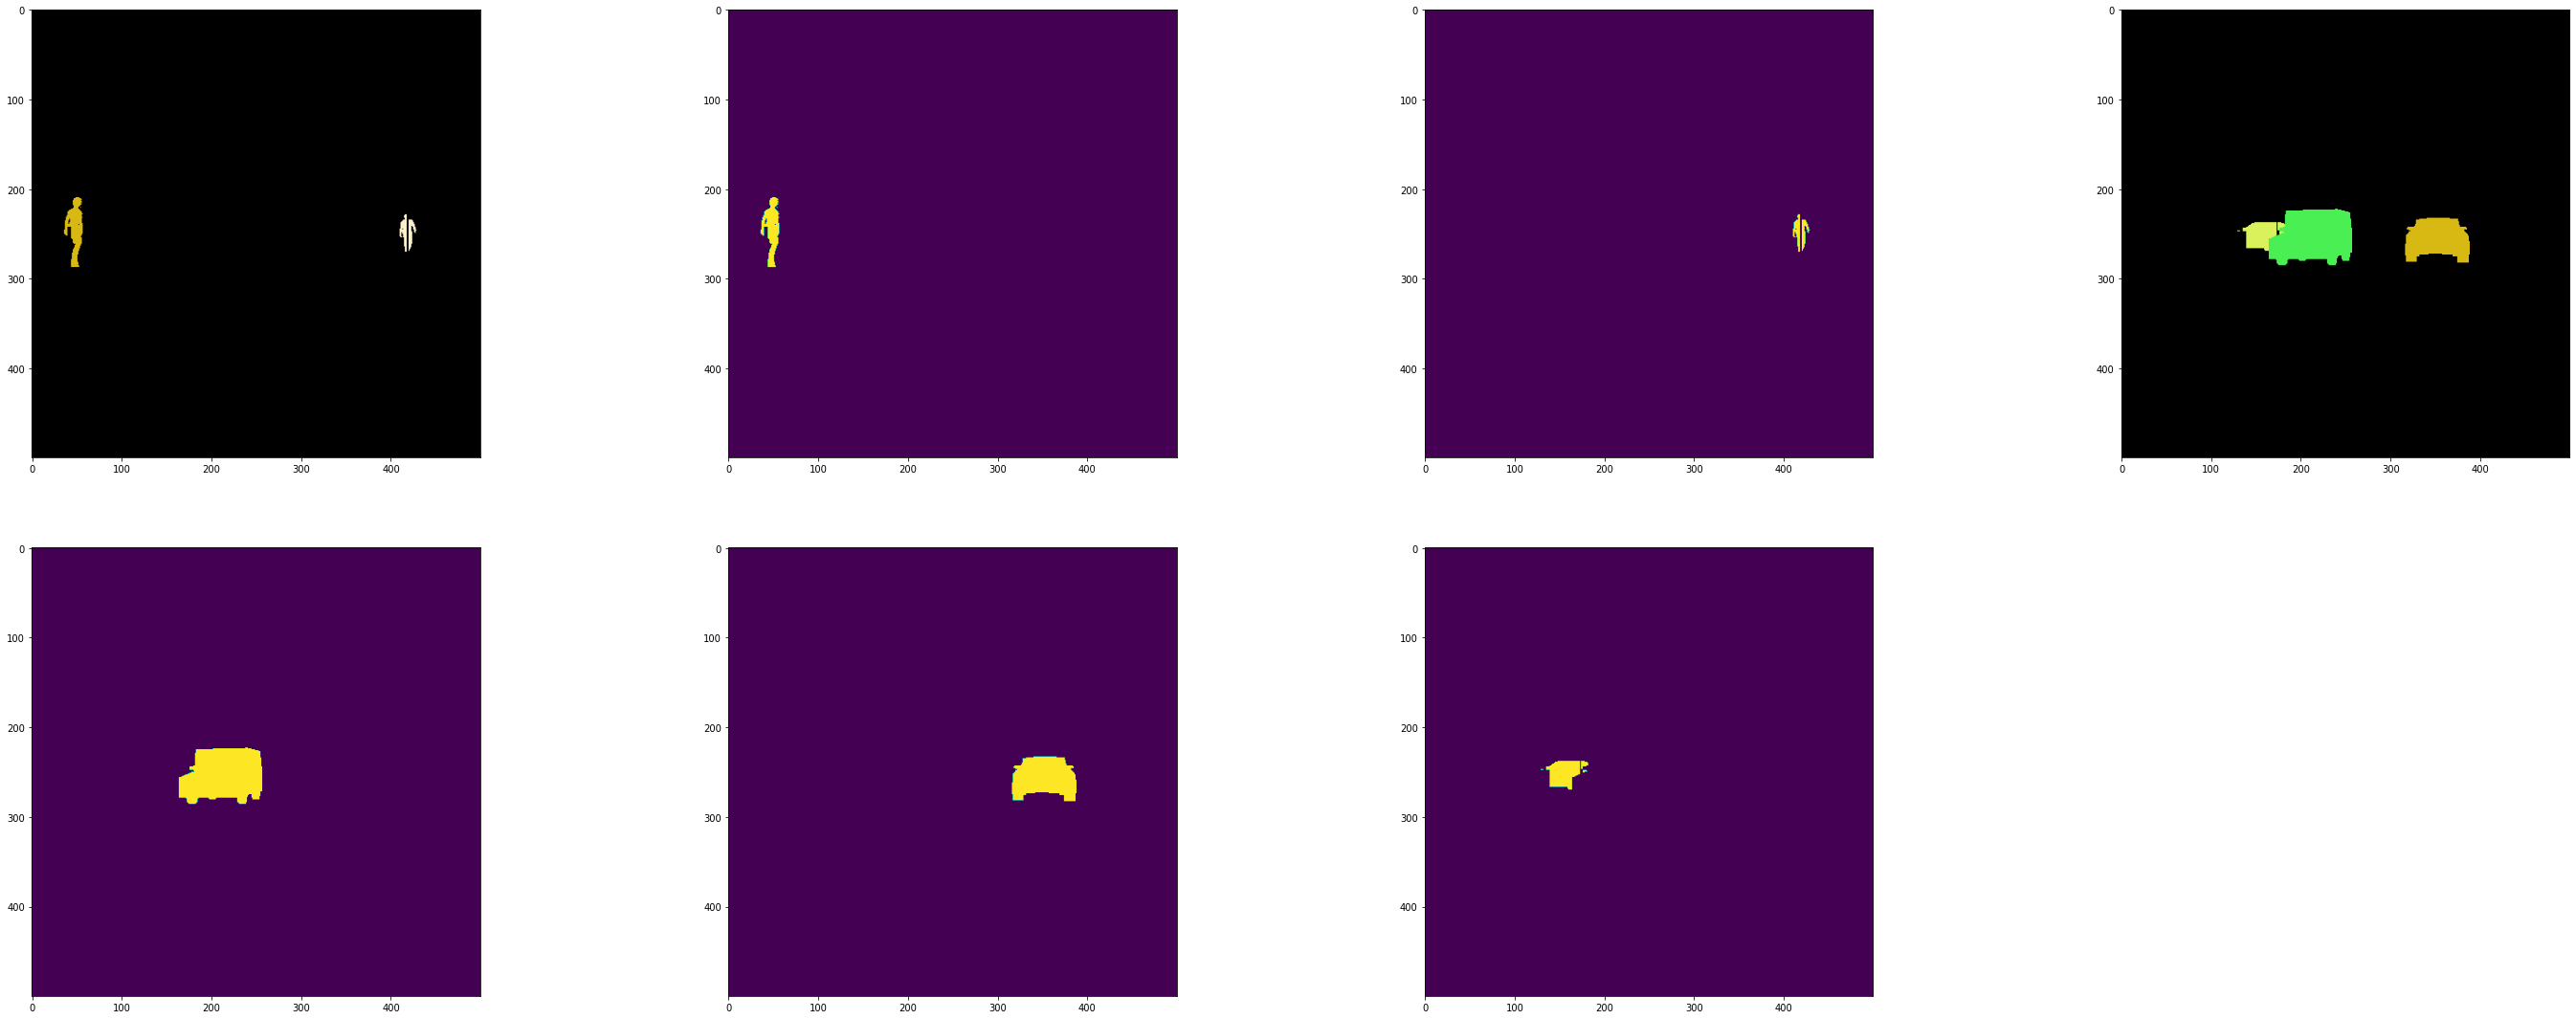

In [6]:
fig=plt.figure(figsize=(50, 50))

CATEGORY = np.array(CATEGORY_IMAGE, dtype=np.uint8)
SEGMENTATION = np.array(SEGMENTATION_IMAGE, dtype=np.uint8)
counter = 1

for cat in categories:
    
    # Get category mask
    name = cat['name']
    MASK_CATEGORY = only_color(cat['color'], CATEGORY)
    
    # Leave only one category in segmentation image
    SEGMENTATION2 = np.copy(SEGMENTATION)
    SEGMENTATION2[:,:,0] *= MASK_CATEGORY
    SEGMENTATION2[:,:,1] *= MASK_CATEGORY
    SEGMENTATION2[:,:,2] *= MASK_CATEGORY
    
    fig.add_subplot(5, 4, counter)
    plt.imshow(Image.fromarray(SEGMENTATION2))
    counter += 1
    
    # Compute colors left
    diff_colors = np.unique(SEGMENTATION2.reshape(-1, SEGMENTATION2.shape[2]), axis=0)
    
    for color in diff_colors:
        
        # if color is not black
        if color[0] != 0 or color[1] != 0 or color[2] != 0:
            
            MASK_SEGMENTATION = only_color(color, SEGMENTATION2)
            
            # Visualize
            fig.add_subplot(5, 4, counter)
            plt.imshow(Image.fromarray(MASK_SEGMENTATION))
            counter += 1

plt.show()